In [36]:
import mat73
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from data._utils import ROOT_DIR, load_Nichols2017
from preprocess._utils import smooth_data_preprocess, reshape_calcium_data


In [2]:
dataset = load_Nichols2017()
source_path = os.path.join(ROOT_DIR, "opensource_data")


In [29]:
for key in dataset["worm0"].keys():
    print(key)

dataset
worm
calcium_data
smooth_calcium_data
residual_calcium
smooth_residual_calcium
neuron_to_idx
idx_to_neuron
max_time
time_in_seconds
dt
num_neurons
num_named_neurons
num_unknown_neurons
named_neurons_mask
unknown_neurons_mask
neurons_mask
named_neuron_to_idx
idx_to_named_neuron
unknown_neuron_to_idx
idx_to_unknown_neuron
slot_to_named_neuron
named_neuron_to_slot
slot_to_unknown_neuron
unknown_neuron_to_slot
slot_to_neuron
neuron_to_slot


In [26]:
dataset["worm0"]["named_neuron_to_slot"]

{'ADAL': 0,
 'ADAR': 1,
 'ADEL': 2,
 'ADER': 3,
 'ADFL': 4,
 'ADFR': 5,
 'ADLL': 6,
 'ADLR': 7,
 'AFDL': 8,
 'AFDR': 9,
 'AIAL': 10,
 'AIAR': 11,
 'AIBL': 12,
 'AIBR': 13,
 'AIML': 14,
 'AIMR': 15,
 'AINL': 16,
 'AINR': 17,
 'AIYL': 18,
 'AIYR': 19,
 'AIZL': 20,
 'AIZR': 21,
 'ALA': 22,
 'ALML': 23,
 'ALMR': 24,
 'ALNL': 25,
 'ALNR': 26,
 'AQR': 27,
 'AS1': 28,
 'AS10': 29,
 'AS11': 30,
 'AS2': 31,
 'AS3': 32,
 'AS4': 33,
 'AS5': 34,
 'AS6': 35,
 'AS7': 36,
 'AS8': 37,
 'AS9': 38,
 'ASEL': 39,
 'ASER': 40,
 'ASGL': 41,
 'ASGR': 42,
 'ASHL': 43,
 'ASHR': 44,
 'ASIL': 45,
 'ASIR': 46,
 'ASJL': 47,
 'ASJR': 48,
 'ASKL': 49,
 'ASKR': 50,
 'AUAL': 51,
 'AUAR': 52,
 'AVAL': 53,
 'AVAR': 54,
 'AVBL': 55,
 'AVBR': 56,
 'AVDL': 57,
 'AVDR': 58,
 'AVEL': 59,
 'AVER': 60,
 'AVFL': 61,
 'AVFR': 62,
 'AVG': 63,
 'AVHL': 64,
 'AVHR': 65,
 'AVJL': 66,
 'AVJR': 67,
 'AVKL': 68,
 'AVKR': 69,
 'AVL': 70,
 'AVM': 71,
 'AWAL': 72,
 'AWAR': 73,
 'AWBL': 74,
 'AWBR': 75,
 'AWCL': 76,
 'AWCR': 77,
 'BAGL': 7

In [27]:
dataset["worm0"]["named_neuron_to_idx"]

{'AFDR': 95,
 'ALA': 96,
 'AQR': 97,
 'ASKL': 98,
 'AUAL': 99,
 'AUAR': 100,
 'AVAL': 101,
 'AVFL': 102,
 'AVFR': 103,
 'BAGL': 104,
 'BAGR': 105,
 'DB2': 106,
 'IL2DL': 107,
 'RID': 108,
 'RIS': 109,
 'RMED': 110,
 'RMEV': 111,
 'URXL': 112,
 'URYDL': 113,
 'URYDR': 114,
 'VB1': 115,
 'VB2': 116}

In [22]:
calcium_data = dataset["worm0"]["calcium_data"]
calcium_data.shape


torch.Size([4224, 302])

In [25]:
dataset["worm0"]["named_neuron_to_slot"]["AVAL"]

53

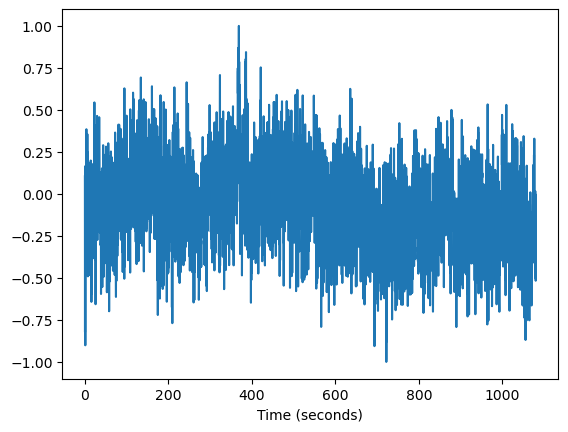

In [23]:
plt.figure()
plt.plot(dataset["worm0"]["time_in_seconds"], 
         calcium_data[:,53]) 
plt.xlabel("Time (seconds)")
plt.show()

In [30]:
# 'n2_prelet' : prelathargic = awake
# load the second .mat file
arr = mat73.loadmat(os.path.join(source_path, "Nichols2017", "n2_prelet.mat"))[
    "n2_prelet"
]

In [33]:
for key in arr.keys():
    print(key)

FiveStates
FourStates
IDs
dataset
fps
stimulus
timeVectorSeconds
traces
tracesDif


In [44]:
all_IDs = arr["IDs"]  # identified neuron IDs (only subset have neuron names)
all_traces = arr["traces"]  # neural activity traces corrected for bleaching

In [48]:
len(all_traces)


11

In [51]:
for i, trace in enumerate(all_traces):
    print(i, trace.shape)

0 (3721, 116)
1 (3863, 111)
2 (3595, 106)
3 (3596, 115)
4 (3453, 100)
5 (3446, 102)
6 (3957, 102)
7 (3797, 87)
8 (3033, 82)
9 (3797, 104)
10 (3633, 82)


In [50]:
trace

array([[0.36077894, 0.15311539, 0.12601104, ..., 0.36842926, 0.63176987,
        0.2870731 ],
       [0.37693464, 0.13284865, 0.06680947, ..., 0.37787048, 0.65558208,
        0.33175102],
       [0.43839576, 0.12688289, 0.1146008 , ..., 0.41932123, 0.66682454,
        0.33812104],
       ...,
       [0.11067008, 0.04612675, 0.05279504, ..., 0.15589348, 0.20677533,
        0.74065276],
       [0.04967216, 0.04743663, 0.05798707, ..., 0.17750003, 0.23712831,
        0.66325751],
       [0.09291643, 0.04012206, 0.06595285, ..., 0.13781165, 0.20395894,
        0.76229594]])

In [52]:
timeVectorSeconds = arr["timeVectorSeconds"]
print("num. worms:", len(all_IDs), end="\n\n")
for ii, real_data in enumerate(all_traces):
    worm = "worm" + str(ii + i + 1)
    ii_IDs = [(j[0] if isinstance(j, list) else j) for j in all_IDs[ii]]
    ii_IDs = [
        (str(_) if j is None or isinstance(j, np.ndarray) else str(j))
        for _, j in enumerate(ii_IDs)
    ]
    _, inds = np.unique(
        ii_IDs, return_index=True
    )  # only keep indices of unique neuron IDs
    ii_IDs = [ii_IDs[_] for _ in inds]
    real_data = real_data[:, inds.astype(int)]  # only get data for unique neurons
    neuron_to_idx = {
        nid: (str(nid) if (j is None or isinstance(j, np.ndarray)) else str(j))
        for nid, j in enumerate(ii_IDs)
    }
    neuron_to_idx = {
        nid: (
            name.replace("0", "")
            if not name.endswith("0") and not name.isnumeric()
            else name
        )
        for nid, name in neuron_to_idx.items()
    }
    neuron_to_idx = dict((v, k) for k, v in neuron_to_idx.items())
    max_time, num_neurons = real_data.shape
    time_in_seconds = timeVectorSeconds[ii].reshape(
        timeVectorSeconds[ii].shape[0], 1
    )
    time_in_seconds = torch.tensor(time_in_seconds)
    dt = torch.zeros_like(time_in_seconds)
    dt[1:] = time_in_seconds[1:] - time_in_seconds[:-1]
    num_named = len(
        [k for k in neuron_to_idx.keys() if not k.isnumeric()]
    )  # number of neurons that were ID'd
    print(
        "len. Ca recording %s, total num. neurons %s, num. ID'd neurons %s"
        % (max_time, num_neurons, num_named),
        end="\n\n",
    )
    real_data = torch.tensor(
        real_data[:, :num_neurons], dtype=torch.float64
    )  # add a feature dimension and convert to tensor
    break

num. worms: 11

len. Ca recording 3721, total num. neurons 116, num. ID'd neurons 35



In [53]:
print(real_data.shape)

torch.Size([3721, 116]) {'0': 0, '1': 1, '10': 2, '100': 3, '101': 4, '102': 5, '103': 6, '104': 7, '106': 8, '109': 9, '11': 10, '110': 11, '111': 12, '113': 13, '12': 14, '13': 15, '15': 16, '16': 17, '17': 18, '18': 19, '2': 20, '20': 21, '24': 22, '25': 23, '26': 24, '28': 25, '3': 26, '31': 27, '33': 28, '34': 29, '39': 30, '4': 31, '41': 32, '45': 33, '46': 34, '47': 35, '48': 36, '5': 37, '50': 38, '51': 39, '52': 40, '53': 41, '54': 42, '55': 43, '57': 44, '59': 45, '6': 46, '60': 47, '62': 48, '63': 49, '67': 50, '68': 51, '69': 52, '7': 53, '70': 54, '71': 55, '73': 56, '74': 57, '75': 58, '76': 59, '77': 60, '78': 61, '79': 62, '8': 63, '80': 64, '81': 65, '82': 66, '83': 67, '84': 68, '85': 69, '88': 70, '89': 71, '9': 72, '91': 73, '92': 74, '93': 75, '95': 76, '96': 77, '97': 78, '98': 79, '99': 80, 'AFDR': 81, 'AIBL': 82, 'AIBR': 83, 'ALA': 84, 'AQR': 85, 'ASKL': 86, 'AVAL': 87, 'AVAR': 88, 'AVBL': 89, 'AVBR': 90, 'AVEL': 91, 'AVFL': 92, 'OLQDR': 93, 'OLQVL': 94, 'RIBL':

In [54]:
neuron_to_idx['AVAL']

87

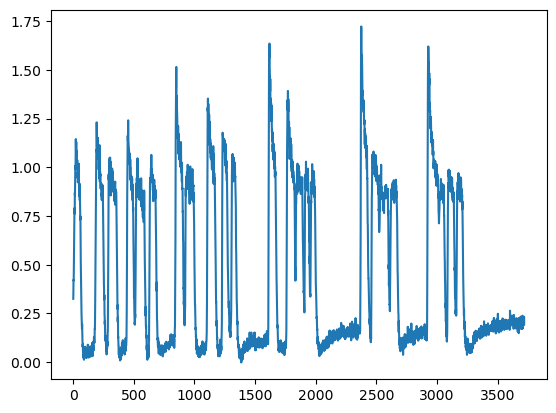

In [55]:
plt.plot(real_data[:, neuron_to_idx['AVAL']])